# GeoPandas

## Basics

### Import / Install / Mount Data

Google Colab Runtime doesn't include the geopandas and descartes. 
Install **GeoPandas**, **descartes**, **geojson** and Mount **Google Drive** folder as your data point

In [1]:
!pip install geopandas
!pip install descartes
!pip install geojson
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 901kB 36.7MB/s 
     |████████████████████████████████| 17.9MB 41.2MB/s 
     |████████████████████████████████| 10.8MB 40.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from __future__ import (absolute_import, division, print_function)

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

data_pth = "/content/gdrive/My Drive/DATA"
mpl.__version__, pd.__version__, gpd.__version__

('3.0.3', '0.24.2', '0.5.0')

### GeoSeries created from a list of shapely Point objects

This is a a way of creating raw data directly.

In [3]:
from shapely.wkt import loads

GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

### `GeoSeries` created from a list of `shapely Point` objects using the `Point` constructor

In [4]:
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [5]:
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

A GeoSeries (and a GeoDataFrame) can store a CRS (Coordinate Reference System) implicitly associated with the geometry column. This is useful as essential spatial metadata and for transformation (reprojection) to another CRS. Let's assign the CRS.

In [0]:
gs.crs = {'init': 'epsg:4326'}

The `plot` method accepts standard `matplotlib.pyplot` style options, and can be tweaked like any other `matplotlib` figure.

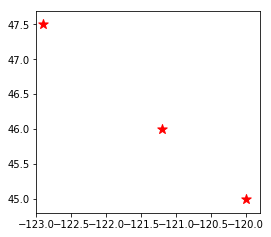

In [7]:
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

First, we'll define a simple dictionary of lists, that we'll use again later.

In [0]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [9]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

We'll wrap up by creating a GeoSeries where we explicitly define the index values.

In [10]:
gs = GeoSeries(geometry, index=data['name'])
gs

a        POINT (-120 45)
b      POINT (-121.2 46)
c    POINT (-122.9 47.5)
dtype: object

### Start with a simple, manually constructed illustration

We'll build on the GeoSeries examples. Let's reuse the `data` dictionary we defined earlier, this time to create a DataFrame.

In [11]:
df = pd.DataFrame(data)
df

,name,lat,lon
0,a,45.0,-120.0
1,b,46.0,-121.2
2,c,47.5,-122.9


Now we use the DataFrame and the "list-of-shapely-Point-objects" approach to create a GeoDataFrame. Note the use of two DataFrame attribute columns, which are effectively just two simple Pandas Series.

In [0]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

There's nothing new to visualize, but this time we're using the `plot` method from a GeoDataFrame, *not* from a GeoSeries. They're not exactly the same thing under the hood.

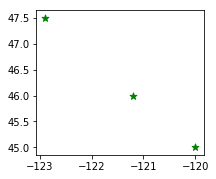

In [13]:
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3));

## Working with real data!

### Load and examine the simple "oceans" shape file

`gpd.read_file` is the workhorse for reading GIS files. It leverages the [fiona](http://toblerity.org/fiona/README.html) package.

In [14]:
oceans = gpd.read_file(os.path.join(data_pth, "oceans.shp"))
oceans.head()

,my_polygon,ID,Oceans,geometry
0,S.Atlantic,1,South Atlantic Ocean,POLYGON ((-67.26025728926088 -59.9309210526315...
1,N.Pacific,0,North Pacific Ocean,"(POLYGON ((180 66.27034771241199, 180 0, 101.1..."
2,Southern,3,Southern Ocean,"POLYGON ((180 -60, 180 -90, -180 -90, -180 -60..."
3,Arctic,2,Arctic Ocean,POLYGON ((-100.1196521436255 52.89103112710165...
4,Indian,5,Indian Ocean,POLYGON ((19.69705552221351 -59.94160091330382...


The `crs` was read from the shape file's `prj` file:

In [15]:
oceans.crs

{'init': 'epsg:4326'}

Now we finally plot a real map (or blobs, depending on your aesthetics), from a dataset that's global-scale and stored in "geographic" (latitude & longitude) coordinates. It's *not* the actual ocean shapes defined by coastal boundaries, but bear with me. A colormap has been applied to distinguish the different Oceans.

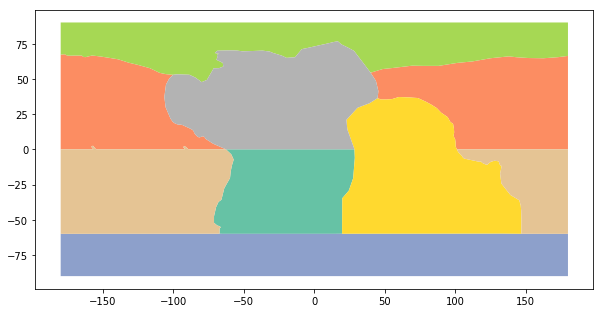

In [16]:
oceans.plot(cmap='Set2', figsize=(10, 10));

`oceans.shp` stores both `Polygon` and `Multi-Polygon` geometry types (a `Polygon` may also be viewed as a `Multi-Polygon` with 1 member). We can get at the geometry types and other geometry properties easily.

In [17]:
oceans.geom_type

0         Polygon
1    MultiPolygon
2         Polygon
3         Polygon
4         Polygon
5    MultiPolygon
6         Polygon
dtype: object

In [18]:
# Beware that these area calculations are in degrees, which is fairly useless
oceans.geometry.area

0     5287.751094
1    11805.894558
2    10822.509589
3     9578.786157
4     9047.879388
5     9640.457926
6     8616.721287
dtype: float64

In [19]:
oceans.geometry.bounds

,minx,miny,maxx,maxy
0,-71.183612,-60.000000,28.736134,0.000000
1,-180.000000,0.000000,180.000000,67.479386
2,-180.000000,-90.000000,180.000000,-59.806846
3,-180.000000,47.660532,180.000000,90.000000
4,19.697056,-59.945004,146.991853,37.102940
5,-180.000000,-60.000000,180.000000,2.473291
6,-106.430148,0.000000,45.468236,76.644442


The `envelope` method returns the bounding box for each polygon. This could be used to create a new spatial column or GeoSeries; directly for plotting; etc.

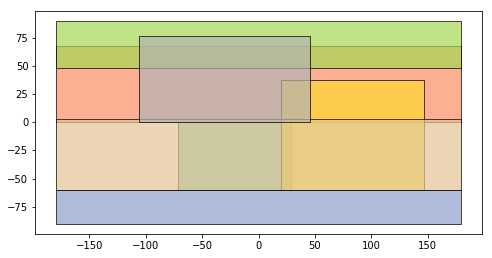

In [20]:
oceans.envelope.plot(cmap='Set2', figsize=(8, 8), alpha=0.7, edgecolor='black');

Does it seem weird that some envelope bounding boxes, such as the North Pacific Ocean, span all longitudes? That's because they're Multi-Polygons with edges at the ends of the -180 and +180 degree coordinate range.

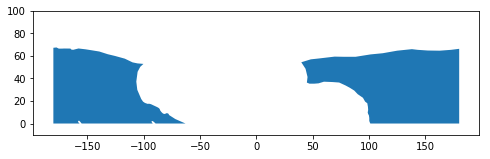

In [21]:
oceans[oceans['Oceans'] == 'North Pacific Ocean'].plot(figsize=(8, 8));
plt.ylim([-10, 100]);

### Load "Natural Earth" countries dataset, bundled with GeoPandas
*"[Natural Earth](http://www.naturalearthdata.com) is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software."* A subset comes bundled with GeoPandas and is accessible from the `gpd.datasets` module. We'll use it as a helpful global base layer map.

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...


Its CRS is also EPSG:4326:

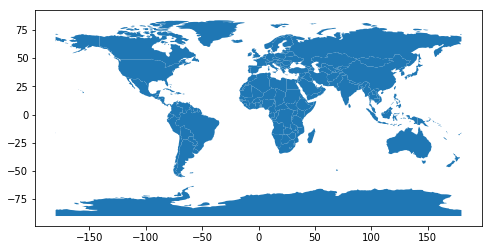

In [23]:
world.plot(figsize=(8, 8));

### Map plot overlays: Plotting multiple spatial layers

Here's a compact, quick way of using the GeoDataFrame plot method to overlay two GeoDataFrames while customizing the styles for each layer.

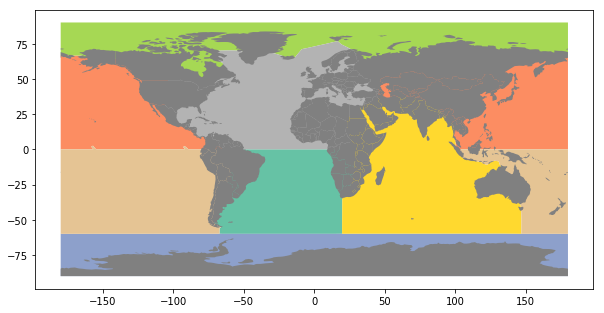

In [24]:
world.plot(ax=oceans.plot(cmap='Set2', figsize=(10, 10)), facecolor='gray');

We can also compose the plot using conventional `matplotlib` steps and options that give us more control.

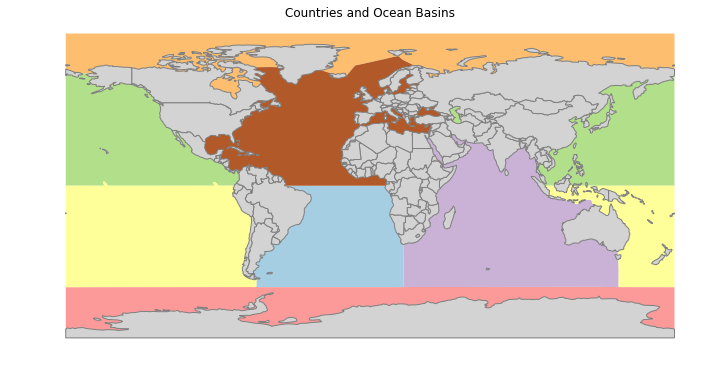

In [25]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('Countries and Ocean Basins')
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
oceans.plot(ax=ax, cmap='Paired')
world.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

## Reading from other data source types; plotting

### Read PostgreSQL/PostGIS dataset from the Amazon Cloud
The fact that it's on an Amazon Cloud is irrelevant. The approach is independent of the location of the database server; it could be on your computer.

In [26]:
import json
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


First we'll read the database connection information from a hidden JSON file, to add a level of security and not expose all that information on the github GeoHackWeek repository. This is also a good practice for handling sensitive information.

In [0]:
with open(os.path.join(data_pth, "db.json")) as f:
    db_conn_dict = json.load(f)

Open the database connection, returning a connection object:

In [0]:
conn = psycopg2.connect(**db_conn_dict)

Now that we've used the connection information, we'll overwrite the `user` and `password` keys (for security) and print out the dictionary, to give you a look at what needs to be in it:

In [29]:
db_conn_dict['user'] = '*****'
db_conn_dict['password'] = '*****'
db_conn_dict

{'database': 'geohack',
 'host': 'dssg2017.csya4zsfb6y4.us-east-1.rds.amazonaws.com',
 'password': '*****',
 'port': 5432,
 'user': '*****'}

Finally, the magic: Read in the `world_seas` PostGIS dataset (a spatially enabled table in the PostgreSQL database) into a GeoDataFrame, using the opened connection object. Note the use of a simple SQL query string: `select * from world_seas`

In [0]:
seas = gpd.read_postgis("select * from world_seas", conn, 
                        coerce_float=False)

In [31]:
seas.crs

{'init': 'epsg:4326'}

Close the connection. Clean up after yourself.

In [0]:
conn.close()

Let's take a look at the GeoDataFrame.

In [33]:
seas.head()

,gid,name,id,gazetteer,is_generic,oceans,geom
0,1,Inner Seas off the West Coast of Scotland,18,4283,False,North Atlantic Ocean,(POLYGON ((-6.496945454545455 58.0874909090909...
1,2,Mediterranean Sea - Western Basin,28A,4279,False,North Atlantic Ocean,"(POLYGON ((12.4308 37.80325454545454, 12.41498..."
2,3,Mediterranean Sea - Eastern Basin,28B,4280,False,North Atlantic Ocean,(POLYGON ((23.60853636363636 35.60874545454546...
3,4,Sea of Marmara,29,3369,False,North Atlantic Ocean,(POLYGON ((26.21790909090909 40.05290909090909...
4,5,Black Sea,30,3319,False,North Atlantic Ocean,(POLYGON ((29.04846363636364 41.25555454545454...


### More advanced plotting and data filtering

Color the layer based on one column that aggregates individual polygons; using a categorical map, as before, but explicitly selecting the column (`column='oceans'`) and categorical mapping (`categorical=True`); displaying an auto-generated legend, while displaying all polygon boundaries. Each "oceans" entry (ocean basins, actually) contain one or more 'seas'.

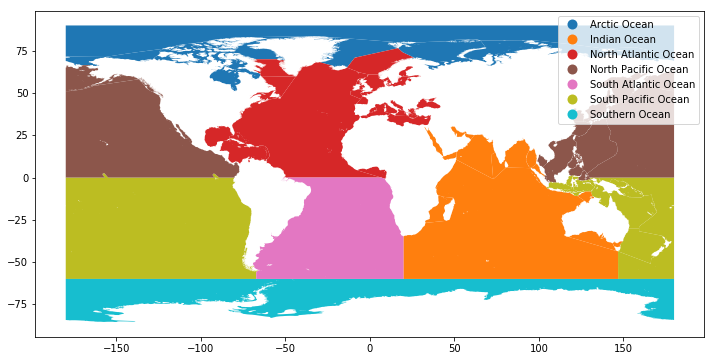

In [34]:
seas.plot(column='oceans', categorical=True, legend=True, figsize=(14, 6));

Combine what we've learned. A map overlay, using `world` as a background layer, and filtering `seas` based on an attribute value (from `oceans` column) and an auto-derived GeoPandas geometry attribute (`area`). **`world` is in gray, while the filtered `seas` is in color.**

In [0]:
seas_na_arealt1000 = seas[(seas['oceans'] == 'North Pacific Ocean') 
                          & (seas.geometry.area < 1000)]

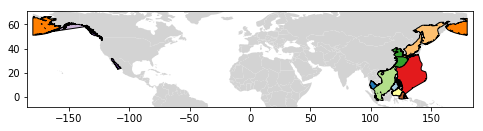

In [36]:
seas_na_arealt1000.plot(ax=world.plot(facecolor='lightgray', figsize=(8, 8)), 
                        cmap='Paired', edgecolor='black')

# Use the bounds geometry attribute to set a nice
# geographical extent for the plot, based on the filtered GeoDataFrame
bounds = seas_na_arealt1000.geometry.bounds

plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

### Save the filtered seas GeoDataFrame to a shape file
The `to_file` method uses the [fiona](http://toblerity.org/fiona/README.html) package to write to a GIS file. The default `driver` for output file format is 'ESRI Shapefile', but many others are available because `fiona` leverages [GDAL/OGR](http://www.gdal.org).

In [0]:
seas_na_arealt1000.to_file(os.path.join(data_pth, "seas_na_arealt1000.shp"))

### Read from OGC WFS GeoJSON response into a GeoDataFrame
Use an [Open Geospatial Consortium](http://www.opengeospatial.org) (OGC) [Web Feature Service](https://en.wikipedia.org/wiki/Web_Feature_Service) (WFS) request to obtain geospatial data from a remote source. OGC WFS is an open geospatial standard.

We won't go into all details about what's going on. Suffice it to say that we issue an OGC WFS request for all features from the layer named "oa:goainv" found in a [GeoServer](http://geoserver.org) instance from [NANOOS](http://nanoos.org), requesting the response in `GeoJSON` format. Then we use the [geojson](https://github.com/frewsxcv/python-geojson) package to "load" the raw response (a GeoJSON string) into a `geojson` feature object (a dictionary-like object).

The "oa:goainv" layer is a global dataset of monitoring sites and cruises where data relevant to ocean acidification are collected. It's a work in progress from the [Global Ocean Acidification Observation Network (GOA-ON)](http://www.goa-on.org); for additional information see the [GOA-ON Data Portal](http://portal.goa-on.org).

In [0]:
import requests
import geojson

wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

r = requests.get(wfs_url, params=params)
wfs_geo = geojson.loads(r.content)

Let's examine the general characteristics of this GeoJSON object, including its `__geo_interface__` interface, which we discussed earlier.

In [40]:
print(type(wfs_geo))
print(wfs_geo.keys())
print(len(wfs_geo.__geo_interface__['features']))

<class 'geojson.feature.FeatureCollection'>
dict_keys(['type', 'totalFeatures', 'crs', 'features'])
596


Now use the `from_features` constructor method to create a GeoDataFrame directly from the  `geojson.feature.FeatureCollection` object.

In [0]:
wfs_gdf = GeoDataFrame.from_features(wfs_geo)

Finally, let's visualize the data set as a simple map overlay plot; and as an example, display the values for the last feature.

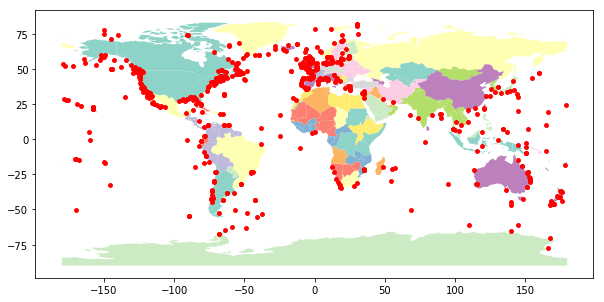

In [42]:
wfs_gdf.plot(ax=world.plot(cmap='Set3', figsize=(10, 6)),
             marker='o', color='red', markersize=15);

In [43]:
wfs_gdf.iloc[-1]

Oceans                                                     South Pacific Ocean
additional_organizations                                                      
agency                                                                        
city                                                                          
comments                                                                      
comments_about_overlaps                                                       
contact_email                                            oar.pmel.co2@noaa.gov
contact_name                                                                  
country                                                                     US
data_url                                                                      
department                                                                    
deploy_date                                                          05/2019 -
depth_range                                         